In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel("colab_rec_df.xlsx" , engine= "openpyxl")

In [3]:
df.shape

(38299, 7)

In [4]:
df.head()

,Montant,Ville de l'affilié,Nom de l'affilié,Adresse PV,Famille Aff.,Groupe Aff.,Consumer_ID
0,39.00,BARDO,ECHEMI,"AV. HEDI NOUIRA ,ENNASR II",FAST FOOD,RESTAURATION,133261221607
1,13.00,LA SOUKRA,WOOD'S PIZZA,"3, RES. EL BOSTENE E4",PIZZERIA,RESTAURATION,141695857
2,22.31,CITE EL GHAZELA,DI NAPOLI,"45B, AV. HABIB BOURGUIBA",RESTAURANT A LA CARTE,RESTAURATION,3568113956
3,8.50,CITE EL GHAZELA,EL MAGICO,"95, AV. FETHI ZOUHIR",PIZZERIA,RESTAURATION,3630752
4,24.00,DEN-DEN,PIZZERIA KAPARI,"10,RUE IBN DHIEF",RESTAURANT A LA CARTE,RESTAURATION,14431003858


In [5]:
label_encoder = LabelEncoder()
df["Ville de l'affilié"] = label_encoder.fit_transform(df["Nom de l'affilié"])
df["Nom de l'affilié"] = label_encoder.fit_transform(df['Nom de l\'affilié'])
df['Adresse PV'] = label_encoder.fit_transform(df['Adresse PV'])
df['Famille Aff.'] = label_encoder.fit_transform(df['Famille Aff.'])
df['Groupe Aff.'] = label_encoder.fit_transform(df['Groupe Aff.'])

In [6]:
X = df[['Montant', "Ville de l'affilié", "Nom de l'affilié", 'Adresse PV', 'Famille Aff.', 'Groupe Aff.']]

In [7]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

In [8]:
user_item_matrix = pd.pivot_table(df, values='Montant', index='Consumer_ID', columns='Cluster', fill_value=0)

In [9]:
knn = NearestNeighbors(metric='cosine')
knn.fit(user_item_matrix.values)

NearestNeighbors(metric='cosine')

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [11]:
cluster_to_restaurant = dict(zip(df['Cluster'], df["Nom de l'affilié"].unique()))

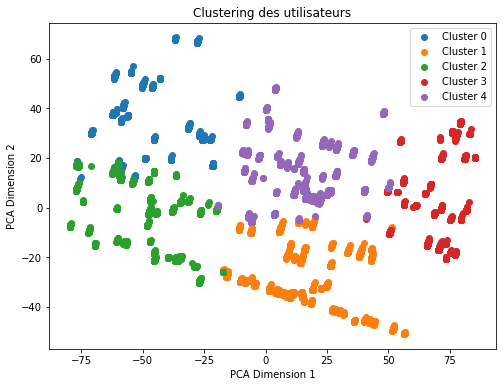

In [12]:
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_points = X_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Clustering des utilisateurs')
plt.legend()
plt.show()

In [13]:
def get_similar_users(user_id, top_n=5):
    user_index = user_item_matrix.index.get_loc(user_id)
    _, indices = knn.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=top_n+1)
    similar_users = user_item_matrix.index[indices.flatten()[1:]]
    return similar_users

In [14]:
user_id = 141695857  # ID de l'utilisateur
similar_users = get_similar_users(user_id, top_n=5)
print("Utilisateurs similaires :", similar_users)

Utilisateurs similaires : Index([34858916, 86541003851, 808625, 808640, 34858961], dtype='object', name='Consumer_ID')


In [15]:
wcss = []  # Within-Cluster Sum of Squares
max_clusters = 10
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


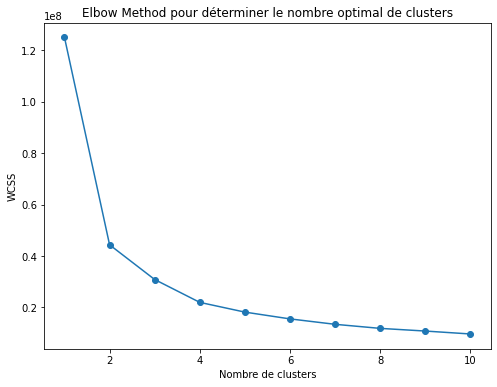

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method pour déterminer le nombre optimal de clusters')
plt.show()

In [17]:
differences = [wcss[i] - wcss[i-1] for i in range(1, len(wcss))]
optimal_num_clusters = differences.index(max(differences)) + 1

print("Le meilleur nombre de clusters (nombre optimal) est :", optimal_num_clusters)

Le meilleur nombre de clusters (nombre optimal) est : 8


In [18]:
wcss = []  # Within-Cluster Sum of Squares
max_clusters = 20
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

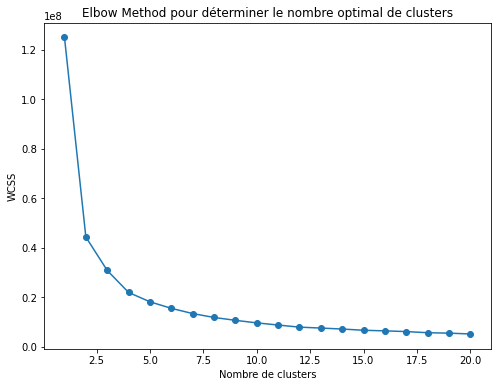

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method pour déterminer le nombre optimal de clusters')
plt.show()

In [20]:
differences = [wcss[i] - wcss[i-1] for i in range(1, len(wcss))]
optimal_num_clusters = differences.index(max(differences)) + 1

print("Le meilleur nombre de clusters (nombre optimal) est :", optimal_num_clusters)

Le meilleur nombre de clusters (nombre optimal) est : 18


In [21]:
wcss = []  # Within-Cluster Sum of Squares
max_clusters = 30
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

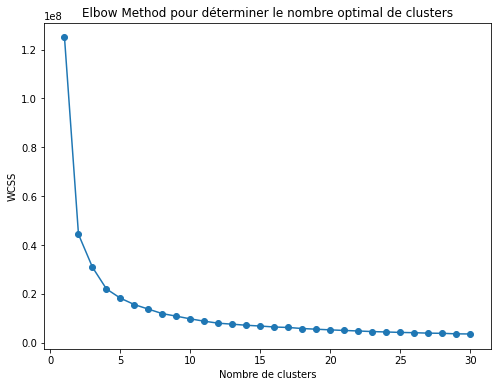

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method pour déterminer le nombre optimal de clusters')
plt.show()

In [23]:
differences = [wcss[i] - wcss[i-1] for i in range(1, len(wcss))]
optimal_num_clusters = differences.index(max(differences)) + 1

print("Le meilleur nombre de clusters (nombre optimal) est :", optimal_num_clusters)

Le meilleur nombre de clusters (nombre optimal) est : 29


In [24]:
kmeans = KMeans(n_clusters=8)  # Spécifiez le nombre de clusters souhaité
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

In [25]:
user_item_matrix = pd.pivot_table(df, values='Montant', index='Consumer_ID', columns='Cluster', fill_value=0)

In [26]:
knn = NearestNeighbors(metric='cosine')
knn.fit(user_item_matrix.values)

NearestNeighbors(metric='cosine')

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

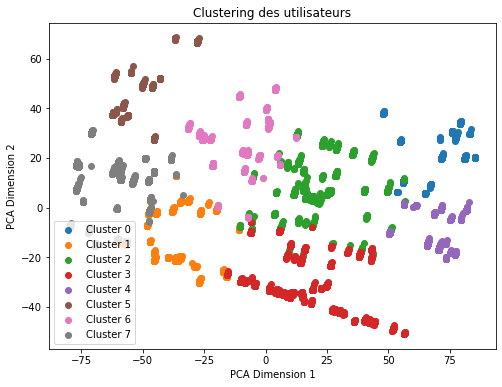

In [28]:
plt.figure(figsize=(8, 6))
for cluster in range(8):
    cluster_points = X_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Clustering des utilisateurs')
plt.legend()
plt.show()

In [29]:
def get_similar_users(user_id, top_n=8):
    user_index = user_item_matrix.index.get_loc(user_id)
    _, indices = knn.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=top_n+1)
    similar_users = user_item_matrix.index[indices.flatten()[1:]]
    return similar_users

In [30]:
user_id = 141695857  # ID de l'utilisateur
similar_users = get_similar_users(user_id, top_n=8)
print("Utilisateurs similaires :", similar_users)

Utilisateurs similaires : Index([14169279, 34859604, 34859602, 34858413, 342315, 34859616, 34859597,
       34858464],
      dtype='object', name='Consumer_ID')


In [31]:
kmeans = KMeans(n_clusters=14)  # Spécifiez le nombre de clusters souhaité
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

In [32]:
user_item_matrix = pd.pivot_table(df, values='Montant', index='Consumer_ID', columns='Cluster', fill_value=0)

In [33]:
knn = NearestNeighbors(metric='cosine')
knn.fit(user_item_matrix.values)

NearestNeighbors(metric='cosine')

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

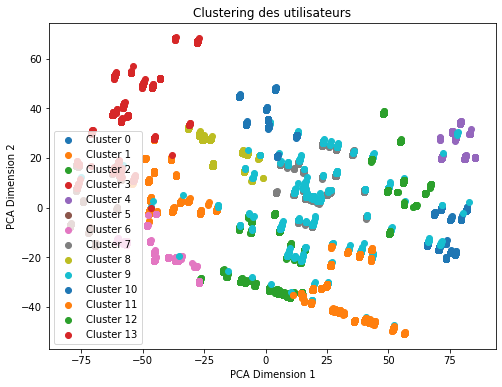

In [35]:
plt.figure(figsize=(8, 6))
for cluster in range(14):
    cluster_points = X_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Clustering des utilisateurs')
plt.legend()
plt.show()

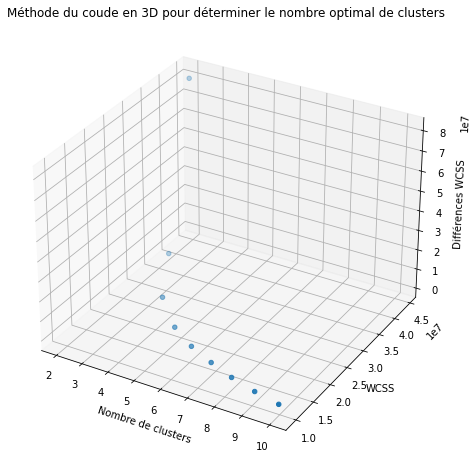

In [36]:
wcss = []  # Within-Cluster Sum of Squares
differences = []  # Différences entre les valeurs WCSS consécutives
max_clusters = 10
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    if n_clusters > 1:
        differences.append(wcss[-2] - wcss[-1])

# Tracé du coude (Elbow) en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Points dans l'espace 3D : (nombre de clusters, WCSS, différences entre WCSS consécutives)
ax.scatter(range(2, max_clusters+1), wcss[1:], differences, marker='o')

ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('WCSS')
ax.set_zlabel('Différences WCSS')

plt.title('Méthode du coude en 3D pour déterminer le nombre optimal de clusters')
plt.show()

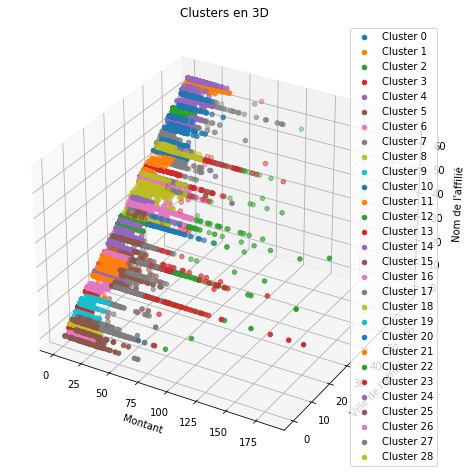

In [37]:
kmeans = KMeans(n_clusters=optimal_num_clusters)
df['Cluster'] = kmeans.fit_predict(X)

# Tracé des clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Coordonnées des caractéristiques pour chaque cluster
for cluster_label in range(optimal_num_clusters):
    cluster_data = df[df['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Montant'], cluster_data["Ville de l'affilié"], cluster_data["Nom de l'affilié"], label=f'Cluster {cluster_label}')

ax.set_xlabel('Montant')
ax.set_ylabel("Ville de l'affilié")
ax.set_zlabel("Nom de l'affilié")

plt.title('Clusters en 3D')
plt.legend()
plt.show()

In [38]:
silhouette_scores = []
for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

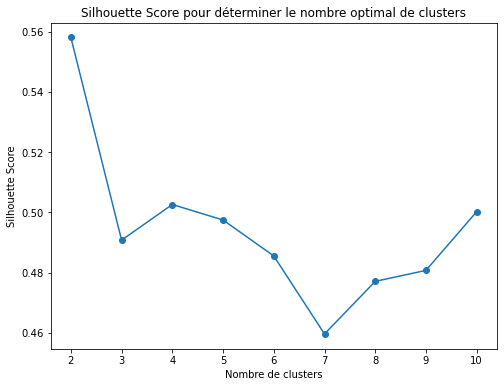

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour déterminer le nombre optimal de clusters')
plt.show()

In [40]:
max_clusters = 10
best_silhouette_score = -1
best_num_clusters = 2  # Start with 2 clusters as the minimum

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print(f"Nombre de clusters : {n_clusters}, Silhouette Score : {silhouette_avg}")
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = n_clusters

print(f"Le meilleur nombre de clusters est : {best_num_clusters} (Silhouette Score : {best_silhouette_score})")

Nombre de clusters : 2, Silhouette Score : 0.5580745087816992
Nombre de clusters : 3, Silhouette Score : 0.490767471786843
Nombre de clusters : 4, Silhouette Score : 0.5025945707502174
Nombre de clusters : 5, Silhouette Score : 0.4879540347582757
Nombre de clusters : 6, Silhouette Score : 0.4854975463978504
Nombre de clusters : 7, Silhouette Score : 0.4670410213216522
Nombre de clusters : 8, Silhouette Score : 0.4739647311505599
Nombre de clusters : 9, Silhouette Score : 0.48591556142800324
Nombre de clusters : 10, Silhouette Score : 0.498319110610752
Le meilleur nombre de clusters est : 2 (Silhouette Score : 0.5580745087816992)


In [41]:
max_clusters = 15
best_silhouette_score = -1
best_num_clusters = 2  # Start with 2 clusters as the minimum

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print(f"Nombre de clusters : {n_clusters}, Silhouette Score : {silhouette_avg}")
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = n_clusters

print(f"Le meilleur nombre de clusters est : {best_num_clusters} (Silhouette Score : {best_silhouette_score})")

Nombre de clusters : 2, Silhouette Score : 0.5580745087816992
Nombre de clusters : 3, Silhouette Score : 0.490767471786843
Nombre de clusters : 4, Silhouette Score : 0.5025945707502174
Nombre de clusters : 5, Silhouette Score : 0.4986615392759932
Nombre de clusters : 6, Silhouette Score : 0.48778071435873815
Nombre de clusters : 7, Silhouette Score : 0.4675558522858107
Nombre de clusters : 8, Silhouette Score : 0.4740954713444362
Nombre de clusters : 9, Silhouette Score : 0.47926926099319617
Nombre de clusters : 10, Silhouette Score : 0.49106496660543747
Nombre de clusters : 11, Silhouette Score : 0.49383563339495185
Nombre de clusters : 12, Silhouette Score : 0.4937847216153983
Nombre de clusters : 13, Silhouette Score : 0.5004736033948507
Nombre de clusters : 14, Silhouette Score : 0.4905272681415511
Nombre de clusters : 15, Silhouette Score : 0.4966938377721827
Le meilleur nombre de clusters est : 2 (Silhouette Score : 0.5580745087816992)


In [42]:
def get_similar_users_2(user_id, top_n=5):
    user_index = user_item_matrix.index.get_loc(user_id)
    _, indices = knn.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=top_n+1)
    similar_user_indices = indices.flatten()[1:]
    similar_users_2 = user_item_matrix.index[similar_user_indices]
    similar_user_names = df[df['Consumer_ID'].isin(similar_users_2)]["Nom de l'affilié"].values
    return list(zip(similar_users_2, similar_user_names))

In [43]:
user_id = 34859604  # ID de l'utilisateur
similar_users_2 = get_similar_users_2(user_id, top_n=5)

In [44]:
valid_cluster_nums = set(df['Cluster'])
if any(cluster_num not in cluster_to_restaurant for cluster_num in valid_cluster_nums):
    print("Error: Cluster numbers not found in the cluster_to_restaurant dictionary.")
else:
    # Map cluster numbers to restaurant names in the output
    similar_users_with_restaurants = [(user, cluster_to_restaurant[cluster_num]) for user, cluster_num in similar_users_2]

Error: Cluster numbers not found in the cluster_to_restaurant dictionary.


In [45]:
restaurants_data = df[df['Consumer_ID'].isin([x[0] for x in similar_users_2])]
restaurant_names =df["Nom de l'affilié"].unique()

In [46]:
print("Utilisateurs similaires :", similar_users_2)
print("Restaurants fréquentés par les utilisateurs similaires :", restaurant_names)

Utilisateurs similaires : [(34853976, 52), (312390000269, 65), (14169526, 65), (14169442, 65), (14169541, 65)]
Restaurants fréquentés par les utilisateurs similaires : [18 65 17 19 38  1 48 39  4  6 50 34 25 23 32 33 21 49 47 61 37 10 41 28
 31 22 30  5 26 51 20 14 12 11 40  2 35 66  7 55 15 42 52 16 56 29 59 43
 44 58  0 62 57 45  8 54 53 60 46 27 24 63 13  9  3 64 36]
